## Double Pendulum Problem (Final)

In [1]:
import numpy as np
from scipy.integrate import solve_ivp

import matplotlib.pyplot as plt
from IPython.display import Image

In [2]:
Image(url = 'https://www.researchgate.net/profile/Iman-Izadgoshasb/publication/331024972/figure/fig1/AS:725254309699586@1549925510035/Double-pendulum-system.png')

In [3]:
class Double_Pendulum():
    """
    Double_Pendulum class implements the parameters and Lagrange's equations for 
     a double pendulum.
     
    Parameters
    ----------
    L1 : float
        length of pendulum 1
    L2 : float
        length of pendulum 2
    g : float
        gravitational acceleration at the earth's surface
    Mn : float
        mass of pendulum, n is the pendulum bob number 

    Methods
    -------
    dy_dt(t, y)
        Returns the right side of the differential equation in vector y, 
        given time t and the corresponding value of y.
    """
   
    def __init__(self, L1=1., L2=1., M1 = 1., M2 = 1., g = 1.):
        self.L1 = L1
        self.L2 = L2
        self.M1 = M1
        self.M2 = M2
        self.g = g
        
    
    def dy_dt(self, t, y):
        """
        This function returns the right-hand side of the diffeq: 
        [dtheta1/dt d^2theta1/dt^2 dtheta2/dt d^2theta2/dt^2]
        
        Parameters
        ----------
        y : float
            A 4-component vector with y[0] = theta1 and y[1] = dtheta1/dt
            y[2] = theta2 and y[3] = dtheta2/dt
        t : float
            time 
            
        Returns
        -------
        
        """
        theta1, z1, theta2, z2 = y
        c, s = np.cos(theta1-theta2), np.sin(theta1-theta2)
        denom = (self.M1 + self.M2 * s**2)
        
        theta1_dot = z1
        z1_dot = (self.M2*self.g*np.sin(theta2)*c \
                 -self.M2*s*(self.L1*z1**2 *c + self.L2*z2**2) \
                 - (self.M1+self.M2)*self.g*np.sin(theta1)) \
                 /self.L1/denom
        
        theta2_dot = z2
        z2_dot = ((self.M1+self.M2) * (self.L1*z1**2 *s \
                    - self.g*np.sin(theta2)+ self.g*np.sin(theta1)*c)
                    + self.M2*self.L2*z2**2*s*c) \
                    /self.L2/denom
                  
        return theta1_dot, z1_dot, theta2_dot, z2_dot
    
   
    def solve_ode(self, t_pts, theta1_0, theta1_dot_0, theta2_0, theta2_dot_0, 
                  abserr=1.0e-10, relerr=1.0e-10):
        """
        Solve the ODE given the array of time points and initial conditions.
        Specify smaller abserr and relerr to get more precision.
        """
        y = [theta1_0, theta1_dot_0, theta2_0, theta2_dot_0]  
        solution = solve_ivp(self.dy_dt, (t_pts[0], t_pts[-1]), y,
                             t_eval = t_pts, atol=abserr, rtol=relerr)
        theta1, theta1_dot, theta2, theta2_dot = solution.y 
        
        return theta1, theta1_dot, theta2, theta2_dot
    
    def total_E(y):
        """
        Total energy of double pendulum 
        """
        t1, t1_dot, t2, t2_dot = y.T
        V = -(M1+M2)*L1*g*np.cos(t1) - M2*L2*g*np.cos(t2)
        T = 0.5*M1*(L1*t1_dot)**2 + 0.5*m2*((L1*t1_dot)**2 + (L2*t2_dot)**2 + 
                2*L1*L2*t1_dot*t2_dot*np.cos(t1-t2))
        return T+V
        

In [4]:
def plot_y_vs_x(x, y, axis_labels=None, label=None, title=None, 
                color=None, linestyle=None, semilogy=False, loglog=False,
                ax=None):
    """
    Generic plotting function: return a figure axis with a plot of y vs. x,
    with line color and style, title, axis labels, and line label
    """
    if ax is None:        # if the axis object doesn't exist, make one
        ax = plt.gca()

    if (semilogy):
        line, = ax.semilogy(x, y, label=label, 
                            color=color, linestyle=linestyle)
    elif (loglog):
        line, = ax.loglog(x, y, label=label, 
                          color=color, linestyle=linestyle)
    else:
        line, = ax.plot(x, y, label=label, 
                    color=color, linestyle=linestyle)

    if label is not None:    # if a label if passed, show the legend
        ax.legend()
    if title is not None:    # set a title if one if passed
        ax.set_title(title)
    if axis_labels is not None:  # set x-axis and y-axis labels if passed  
        ax.set_xlabel(axis_labels[0])
        ax.set_ylabel(axis_labels[1])

    return ax, line

In [5]:
def start_stop_indices(t_pts, plot_start, plot_stop):
    """Given an array (e.g., of times) and desired starting and stop values,
        return the array indices that are closest to those values.
    """
    start_index = (np.fabs(t_pts-plot_start)).argmin()  # index in t_pts array 
    stop_index = (np.fabs(t_pts-plot_stop)).argmin()  # index in t_pts array 
    return start_index, stop_index

In [6]:
# Labels for individual plot axes
theta_vs_time_labels = (r'$t$', r'$\theta(t)$')

# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 50.
delta_t = 0.001

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

L1 = 1.
L2 = 1.
M1 = 1.
M2 = 1.
g = 1.


# Instantiate a pendulum 
p1 = Double_Pendulum(L1=L1, L2=L2, M1 = M1, M2 = M2, g = g)

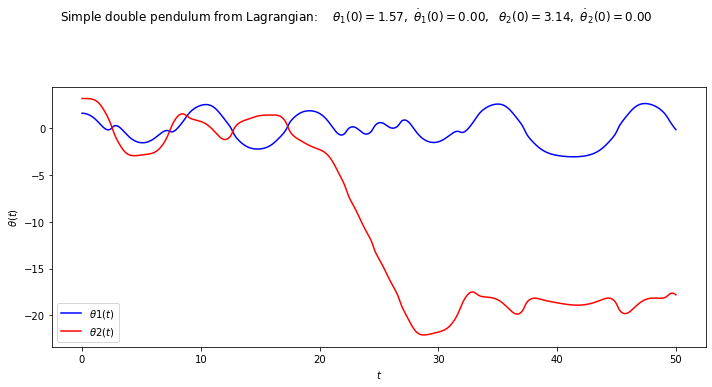

In [7]:
# both plots: same initial conditions
theta1_0 = (1./2.)*np.pi
theta1_dot_0 = 0.
theta2_0 = np.pi
theta2_dot_0 = 0.

theta1, theta_dot, theta2, theta2_dot=p1.solve_ode(t_pts,theta1_0, theta1_dot_0, theta2_0, theta2_dot_0)


# start the plot!
fig = plt.figure(figsize=(10,5))
overall_title = 'Simple double pendulum from Lagrangian:  ' + \
                rf'  $\theta_1(0) = {theta1_0:.2f},$' + \
                rf' $\dot\theta_1(0) = {theta1_dot_0:.2f},$' + \
                rf'  $\theta_2(0) = {theta2_0:.2f},$' + \
                rf' $\dot\theta_2(0) = {theta2_dot_0:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# first plot: theta plot 
ax_a = fig.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], theta1[start : stop], 
            axis_labels=theta_vs_time_labels, 
            color='blue',
            label=r'$\theta1(t)$', 
            ax=ax_a)   
plot_y_vs_x(t_pts[start : stop], theta2[start : stop], 
            color='red',
            label=r'$\theta2(t)$', 
            ax=ax_a)   
                              


fig.tight_layout()
fig.savefig('simple_double_pendulum_Lagrange.png', bbox_inches='tight')  

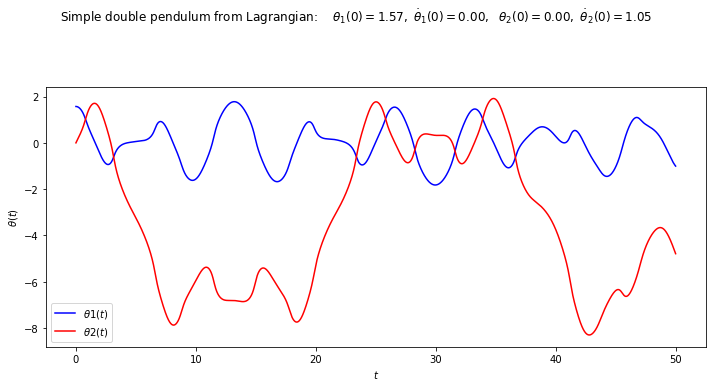

In [8]:
# both plots: same initial conditions
theta1_0 = (1./2.)*np.pi
theta1_dot_0 = 0.
theta2_0 = 0.
theta2_dot_0 = np.pi/3.

theta1, theta_dot, theta2, theta2_dot=p1.solve_ode(t_pts,theta1_0, theta1_dot_0, theta2_0, theta2_dot_0)


# start the plot!
fig = plt.figure(figsize=(10,5))
overall_title = 'Simple double pendulum from Lagrangian:  ' + \
                rf'  $\theta_1(0) = {theta1_0:.2f},$' + \
                rf' $\dot\theta_1(0) = {theta1_dot_0:.2f},$' + \
                rf'  $\theta_2(0) = {theta2_0:.2f},$' + \
                rf' $\dot\theta_2(0) = {theta2_dot_0:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# first plot: theta plot 
ax_a = fig.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], theta1[start : stop], 
            axis_labels=theta_vs_time_labels, 
            color='blue',
            label=r'$\theta1(t)$', 
            ax=ax_a)   
plot_y_vs_x(t_pts[start : stop], theta2[start : stop], 
            color='red',
            label=r'$\theta2(t)$', 
            ax=ax_a)   
                              


fig.tight_layout()
fig.savefig('simple_double_pendulum_Lagrange2.png', bbox_inches='tight')  

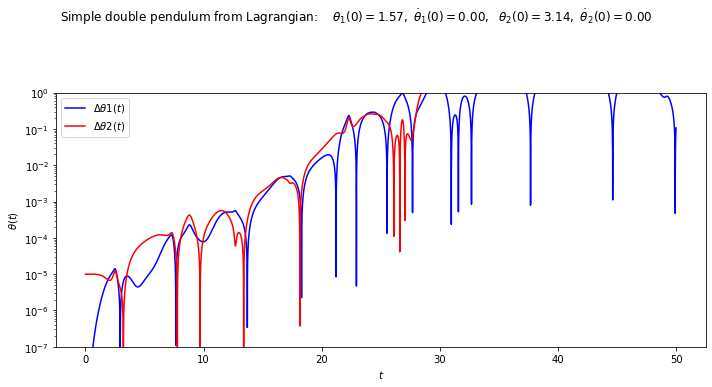

In [9]:
# both plots: same initial conditions
theta1_0 = (1./2.)*np.pi
theta1_dot_0 = 0.
theta2_0 = np.pi
theta2_dot_0 = 0.

theta1, theta_dot, theta2, theta2_dot=p1.solve_ode(t_pts,theta1_0, theta1_dot_0, theta2_0, theta2_dot_0)
theta1b, theta_dotb, theta2b, theta2_dotb=p1.solve_ode(t_pts,theta1_0, theta1_dot_0, theta2_0-0.00001, theta2_dot_0)

# start the plot!
fig = plt.figure(figsize=(10,5))
overall_title = 'Simple double pendulum from Lagrangian:  ' + \
                rf'  $\theta_1(0) = {theta1_0:.2f},$' + \
                rf' $\dot\theta_1(0) = {theta1_dot_0:.2f},$' + \
                rf'  $\theta_2(0) = {theta2_0:.2f},$' + \
                rf' $\dot\theta_2(0) = {theta2_dot_0:.2f}$' + \
                '\n'     # \n means a new line (adds some space here)
fig.suptitle(overall_title, va='baseline')
    
# first plot: theta plot 
ax_a = fig.add_subplot(1,1,1)                  

start, stop = start_stop_indices(t_pts, t_start, t_end)    
plot_y_vs_x(t_pts[start : stop], np.abs(theta1[start : stop]-theta1b[start : stop]), 
            axis_labels=theta_vs_time_labels, 
            color='blue',
            semilogy=True,
            label=r'$\Delta\theta1(t)$', 
            ax=ax_a)   
plot_y_vs_x(t_pts[start : stop], np.abs(theta2[start : stop]-theta2b[start : stop]), 
            color='red', 
            semilogy=True,
            label=r'$\Delta\theta2(t)$', 
            ax=ax_a)   
                              

ax_a.set_ylim(1.e-7,1.)
fig.tight_layout()
fig.savefig('simple_double_pendulum_Lagrange_chaos.png', bbox_inches='tight')  

In [67]:
from matplotlib import animation, rc
from IPython.display import HTML

In [68]:
# Common plotting time (generate the full time then use slices)
t_start = 0.
t_end = 500.
delta_t = 0.01

t_pts = np.arange(t_start, t_end+delta_t, delta_t)  

theta1_0 = (1./2.)*np.pi
theta1_dot_0 = 0.
theta2_0 = np.pi
theta2_dot_0 = 0.

theta1, theta_dot, theta2, theta2_dot=p1.solve_ode(t_pts,theta1_0, theta1_dot_0, theta2_0, theta2_dot_0)
theta1b, theta_dotb, theta2b, theta2_dotb=p1.solve_ode(t_pts,theta1_0, theta1_dot_0, theta2_0+0.001, theta2_dot_0)

L1 = 1.
L2 = 1.
M1 = 1.
M2 = 1.
g = 1.


# Instantiate a pendulum 
p1 = Double_Pendulum(L1=L1, L2=L2, M1 = M1, M2 = M2, g = g)

In [69]:
def xy_coords(x0, y0, theta, L):
    """
    Coverts bob position to x -y coords
    """
    x= x0+ L *np.sin(theta)
    y = y0 - L*np.cos(theta)
    return x, y


In [91]:
%%capture
x_min = -3.2
x_max = -x_min
y_min = -3.2
y_max = -y_min

fig_anim = plt.figure(figsize=(5,5), num='Double Pendulum')
ax_anim = fig_anim.add_subplot(1,1,1)
ax_anim.set_xlim(x_min, x_max)
ax_anim.set_ylim(y_min, y_max)

# By assigning the first return from plot to line_anim, we can later change
#  the values in the line.
x0, y0 = 0.,0.
pt0_anim, = ax_anim.plot(x0, y0, 
                         'o', markersize=6,
                         color='black')
x1, y1 = xy_coords(x0, y0, theta1[0],p1.L1)
pt1_anim, = ax_anim.plot(x1,y1,
                        'o', markersize=12,
                        color = 'blue')
ln1_anim,=ax_anim.plot([x0,x1],[y0,y1],color='blue',lw=3)
x2, y2 = xy_coords(x1, y1, theta2[0],p1.L2)
pt2_anim, = ax_anim.plot(x2,y2,
                        'o', markersize=12,
                        color = 'blue')
ln2_anim,=ax_anim.plot([x1,x2],[y1,y2],color='blue',lw=3)

x1b, y1b = xy_coords(x0, y0, theta1b[0],p1.L1)
pt1b_anim, = ax_anim.plot(x1b,y1b,
                        'o', markersize=12,
                        color = 'red')
ln1b_anim,=ax_anim.plot([x0,x1b],[y0,y1b],color='red',lw=3)
x2b, y2b = xy_coords(x1b, y1b, theta2b[0],p1.L2)
pt2b_anim, = ax_anim.plot(x2b,y2b,
                        'o', markersize=12,
                        color = 'red')
ln2b_anim,=ax_anim.plot([x1b,x2b],[y1b,y2b],color='red',lw=3)

ax_anim.set_aspect(1)
ax_anim.axis('on')
fig_anim.tight_layout()

In [92]:
def animate_pendulum(i):
    i_skip = 2 *i 
    
    x0, y0 = 0.,0.
    pt0_anim.set_data(x0,y0)
    
    x1, y1 = xy_coords(x0, y0, theta1[i_skip], p1.L1)
    pt1_anim.set_data(x1,y1)
    ln1_anim.set_data([x0, x1], [y0,y1])
    
    x2, y2 = xy_coords(x1, y1, theta2[i_skip], p1.L2)
    pt2_anim.set_data(x2,y2)
    ln2_anim.set_data([x1, x2], [y1,y2])
    
    x1b, y1b = xy_coords(x0, y0, theta1b[i_skip], p1.L1)
    pt1b_anim.set_data(x1b,y1b)
    ln1b_anim.set_data([x0, x1b], [y0,y1b])
    
    x2b, y2b = xy_coords(x1b, y1b, theta2b[i_skip], p1.L2)
    pt2b_anim.set_data(x2b,y2b)
    ln2b_anim.set_data([x1b, x2b], [y1b,y2b])
    
    return(pt0_anim, pt1_anim, ln1_anim, pt2_anim, ln2_anim, pt1b_anim,
          ln1b_anim, pt2b_anim, ln2b_anim)
    

In [95]:
frame_interval = 20.  # time between frames
frame_number = 1001    # number of frames to include (index of t_pts)
anim = animation.FuncAnimation(fig_anim, 
                               animate_pendulum, 
                               init_func=None,
                               frames=frame_number, 
                               interval=frame_interval, 
                               blit=True,
                               repeat=False)

#fig.show()

In [96]:
plt.tight_layout()
HTML(anim.to_jshtml())

<Figure size 432x288 with 0 Axes>